# STEP 1 in the Feature Selection Pipeline: Train Random Forest to Identify the informative Features

In [1]:
import time
import glob
import h5py
import multiprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-muted")
from utils.input_pipeline import load_data, load_protein
from scipy.stats import randint as sp_randint

from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Imputer, Normalizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import RandomizedLogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer

random_state=np.random.RandomState(0)
imputer = Imputer()
normalizer = Normalizer()
forest_classifier = RandomForestClassifier(n_jobs=10)
data_path = "data/full_26_kinase_data.h5"

## Load the Data

In [2]:
data_fo = h5py.File(data_path,'r')
protein_list = list(data_fo.keys())
input_size = 0
for protein in protein_list:
    input_size += data_fo[protein]['label'].shape[0]
print(input_size)

361786


In [3]:
X = np.ndarray([0,5432])
y = np.ndarray([0,1])
for protein in protein_list:
    #create a balanced set for each of the proteins by randomly sampling from each of the negative classes
    X_p,y_p = load_data(data_path,protein_name_list=[protein], mode=1)
    X_n, y_n = load_data(data_path,protein_name_list=[protein],sample_size = X_p.shape[0], mode=0)
    X_ = np.vstack((X_p,X_n))
    y_ = np.vstack((y_p,y_n))
    X = np.vstack((X_,X))
    y = np.vstack((y_,y))

  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


  0%|          | 0/1 [00:00<?, ?it/s]

loading 1 proteins.


100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


## Random Forest
The algorithm which constructs a random forest natively performs feature selection by finding the best splits for a particular feature to minimize some measure of label impurity. This can be leveraged as a feature selection method to train other classifiers (in addition to other random forests).

In [4]:
# once new data is ready, remove the imputer, keep normalizing
forest_pipe = Pipeline(steps=[('imputer', imputer), ('normalizer', normalizer),
                              ('selection_forest',RandomForestClassifier(n_jobs=16, oob_score=True, 
                                                                         class_weight="balanced",random_state=random_state))])

forest_params = {"selection_forest__n_estimators": sp_randint(15,30), 
                 "selection_forest__criterion": ["gini","entropy"]
                }

estimator_search = RandomizedSearchCV(estimator=forest_pipe,param_distributions=forest_params, scoring='f1',cv=5, random_state=random_state)

In [5]:
estimator_search.fit(X,y.flatten())
forest_model = estimator_search.best_estimator_
support = forest_model.named_steps['selection_forest'].feature_importances_

/global/homes/w/wdjo224/anaconda3/envs/protein_binding/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/global/homes/w/wdjo224/anaconda3/envs/protein_binding/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/global/homes/w/wdjo224/anaconda3/envs/protein_binding/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/global/homes/w/wdjo224/anaconda3/envs/protein_binding/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis

In [6]:
support = forest_model.named_steps['selection_forest'].feature_importances_

# and collect the features
so that they can be used in later experiments

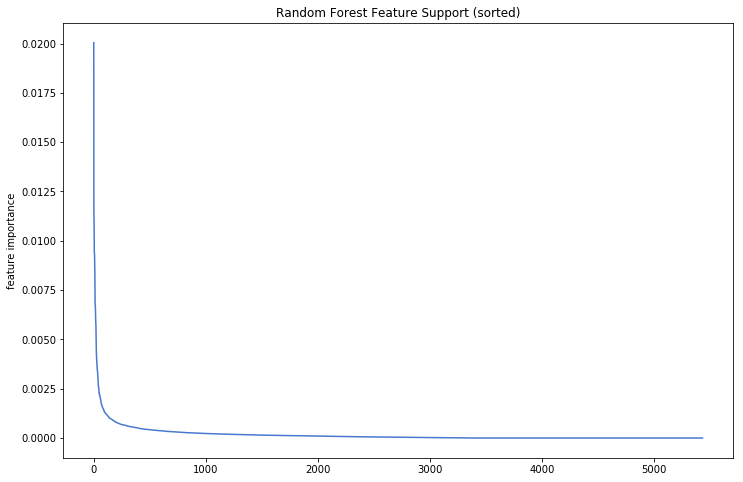

In [8]:
plt.clf()
plt.figure(figsize=[12,8])
plt.plot(np.sort(support)[::-1])
plt.title("Random Forest Feature Support (sorted)")
plt.ylabel("feature importance")
plt.savefig("poster_results/feature_importance_curve_full_set.png")
plt.show()

In [9]:
full_features = list(h5py.File("data/full_26_kinase_data.h5","r")["lck"].keys())

# use a list comprehension instead
full_features.remove("label")
full_features.remove("receptor")
full_features.remove("drugID")

keep_idxs = support > np.mean(support,axis=0)

features_to_keep = np.asarray(full_features)[keep_idxs]

features_to_keep = pd.DataFrame(features_to_keep)
features_to_keep.to_csv("data/step1_features.csv",index=False,header=False)

print(len(full_features),features_to_keep.shape)

5432 (1260, 1)
